In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[u'XMOD', u'hh', u'maxx1', u'maxy', u'minx', u'minx1', u'miny']
(10.0, 5, -13, -13.0, -5)
[-12.9 -12.7 -12.5 -12.3 -12.1 -11.9 -11.7 -11.5 -11.3 -11.1 -10.9 -10.7
 -10.5 -10.3 -10.1  -9.9  -9.7  -9.5  -9.3  -9.1  -8.9  -8.7  -8.5  -8.3
  -8.1  -7.9  -7.7  -7.5  -7.3  -7.1  -6.9  -6.7  -6.5  -6.3  -6.1  -5.9
  -5.7  -5.5  -5.3  -5.1  -4.9  -4.7  -4.5  -4.3  -4.1  -3.9  -3.7  -3.5
  -3.3  -3.1  -2.9  -2.7  -2.5  -2.3  -2.1  -1.9  -1.7  -1.5  -1.3  -1.1
  -0.9  -0.7  -0.5  -0.3  -0.1   0.1   0.3   0.5   0.7   0.9   1.1   1.3
   1.5   1.7   1.9   2.1   2.3   2.5   2.7   2.9   3.1   3.3   3.5   3.7
   3.9   4.1   4.3   4.5   4.7   4.9   5.1   5.3   5.5   5.7   5.9   6.1
   6.3   6.5   6.7   6.9   7.1   7.3   7.5   7.7   7.9   8.1   8.3   8.5
   8.7   8.9   9.1   9.3   9.5   9.7   9.9]


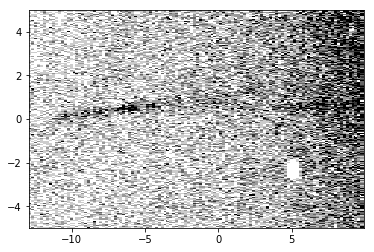

In [2]:
filename = "../power_spectra/to_kian.h5"
with h5py.File(filename, "r") as f:
    print(f.keys())
    print(f['maxx1'].value, f['maxy'].value, f['minx'].value, f['minx1'].value, f['miny'].value)
    xmod = f['XMOD'].value
    xmod = xmod[20:180]
    minx, maxx, miny, maxy = -13, 10, -5, 5
    hh = f['hh'].value
    
myrange = [[minx, maxx], [miny, maxy]]
    
xgrid = np.linspace(myrange[0][0], myrange[0][1], hh.shape[0] + 1,
                    True)

xgrid = xgrid[:-1] + .5 * (xgrid[1] - xgrid[0])
print(xgrid)
ygrid = np.linspace(myrange[1][0], myrange[1][1], hh.shape[1] + 1,
                True)
ygrid = ygrid[:-1] + .5 * (ygrid[1] - ygrid[0])
pp1 = xgrid[:, None] + ygrid[None, :] * 0
pp2 = xgrid[:, None] * 0 + ygrid[None, :]

badpts = (np.array([5., -2.3, 0.5]))
plt.pcolormesh(pp1, pp2, hh, cmap='gray_r', vmax=5)

In [3]:
stream = 'atlas'
hh = np.load('../atlas_stream_coord_catalog.npy')
hh = np.transpose(hh)
pp1 = np.load('../model_arrays/pp1_full_{}.npy'.format(stream))
pp1 = pp1[:,1:-1]
pp2 = np.load('../model_arrays/pp2_full_{}.npy'.format(stream)) 
pp2 = pp2[:,1:-1]
hh[np.where((hh==0) & (pp1<-5))] = np.nan
hh = hh.astype('int')
vv_mask=hh

plt.figure(figsize=(6,3))
plt.pcolormesh(pp1, pp2, hh, vmin = 0, vmax = 10, cmap='gray_r')
#plt.scatter(5, -2.3, c='r', s=10)
plt.xlim(13, -10)

IOError: [Errno 2] No such file or directory: '../atlas_stream_coord_catalog.npy'

In [ ]:
mask = ~((pp1>3.5) & (pp1<4.5) & (pp2>-2.8) & (pp2<-1.8))
n_pix = mask.sum()
print(n_pix)
hhmask = np.copy(hh)
hhmask[np.where(mask)] = -1
plt.pcolormesh(pp1, pp2, hhmask, vmin = 0, vmax = 5, cmap='gray_r')

## ATLAS Y6

# A Few Optimization results

In [5]:
import h5py
minx, maxx, miny, maxy = -13, 10, -5, 5
filename = "../power_spectra/to_kian.h5"
with h5py.File(filename, "r") as f:
    hh = f['hh'].value

myrange = [[minx, maxx], [miny, maxy]]

xgrid = np.linspace(myrange[0][0], myrange[0][1], hh.shape[0] + 1,
                    True)
xgrid = xgrid[:-1] + .5 * (xgrid[1] - xgrid[0])
ygrid = np.linspace(myrange[1][0], myrange[1][1], hh.shape[1] + 1,
                True)
ygrid = ygrid[:-1] + .5 * (ygrid[1] - ygrid[0])
pp1_sergey = xgrid[:, None] + ygrid[None, :] * 0
pp2_sergey = xgrid[:, None] * 0 + ygrid[None, :]

pp1_atlas = np.load('../model_arrays/pp1_full_atlas.npy')[0]
pp1_phoenix = np.load('../model_arrays/pp1_full_phoenix_tall.npy')[0]

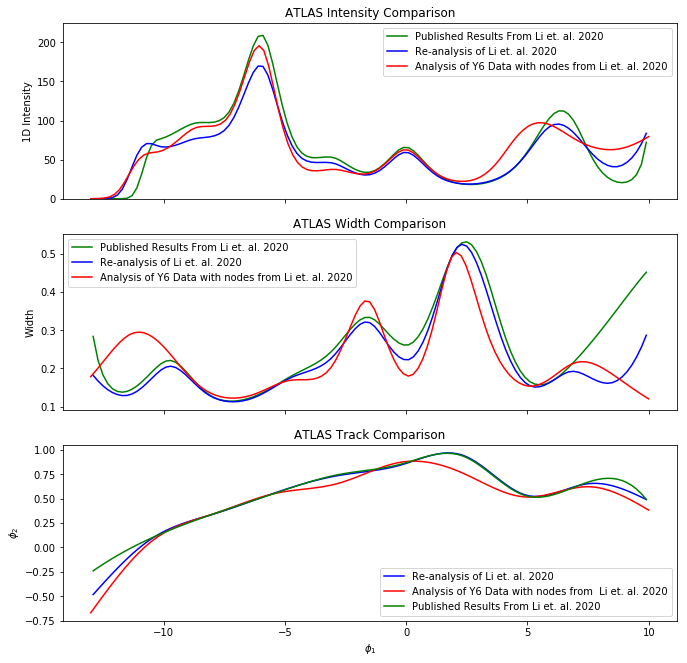

FITS_rec([(-13.        , -1.11187776, 0.4960024 ),
          (-11.35714286, -1.94076575, 0.27632663),
          ( -9.71428571, -1.51008938, 0.19567945),
          ( -8.07142857, -2.04571828, 0.16647059),
          ( -6.42857143, -2.09671999, 0.10261193),
          ( -4.78571429, -1.72537039, 0.16191069),
          ( -3.14285714, -1.42564443, 0.20589603),
          ( -1.5       , -1.0978152 , 0.24019461),
          (  0.14285714, -1.33720308, 0.25219214),
          (  1.78571429, -0.73593594, 0.32700955),
          (  3.42857143, -0.86835931, 0.42758773),
          (  5.07142857, -1.79202873, 0.25786095),
          (  6.71428571, -1.5913826 , 0.21109956),
          (  8.35714286, -1.12017718, 0.53769106),
          ( 10.        , -0.77817356, 0.4290836 )],
         dtype=(numpy.record, [('phi1', '>f8'), ('logwidth_mean', '>f8'), ('logwidth_std', '>f8')]))

In [19]:
from astropy.io import fits
from scipy.interpolate import interp1d

int1d_atlas_sergey_pub = np.load('../model_arrays/atlas_sergey_w_pub_nodes_int1d.npy')
width_atlas_sergey_pub = np.load('../model_arrays/atlas_sergey_w_pub_nodes_width.npy')
fi2_atlas_sergey_pub = np.load('../model_arrays/atlas_sergey_w_pub_nodes_fi2.npy')

int1d_atlas_sergey_opt = np.load('../model_arrays/atlas_sergey_opt_nodes_int1d.npy')
width_atlas_sergey_opt = np.load('../model_arrays/atlas_sergey_opt_nodes_width.npy')
fi2_atlas_sergey_opt = np.load('../model_arrays/atlas_sergey_opt_nodes_fi2.npy')

int1d_atlas_pub = np.load('../model_arrays/atlas_w_pub_nodes_int1d.npy')
width_atlas_pub = np.load('../model_arrays/atlas_w_pub_nodes_width.npy')
fi2_atlas_pub = np.load('../model_arrays/atlas_w_pub_nodes_fi2.npy')

pub_int_li = fits.open('../phoenix_models/pub_int_atlas.fits')[1].data
pub_int_li_spline = interp1d(pub_int_li['phi1'], pub_int_li['logint_mean'], kind='cubic')
pub_width_li = fits.open('../phoenix_models/pub_width_atlas.fits')[1].data
pub_width_li_spline = interp1d(pub_width_li['phi1'], pub_width_li['logwidth_mean'], kind='cubic')
pub_fi2_li = fits.open('../phoenix_models/pub_track_atlas.fits')[1].data
pub_fi2_li_spline = interp1d(pub_fi2_li['phi1'], pub_fi2_li['phi2_mean'], kind='cubic')

int1d_phoenix0 = np.load('../model_arrays/phoenix_opt_nodes_int1d_2.npy')[80]
width_phoenix0 = np.load('../model_arrays/phoenix_opt_nodes_width_2.npy')[80]
fi2_phoenix0 = np.load('../model_arrays/phoenix_opt_nodes_fi2_2.npy')[80]

int1d_atlas = np.load('../model_arrays/atlas_opt_nodes_int1d.npy')[80]
width_atlas = np.load('../model_arrays/atlas_opt_nodes_width.npy')[80]
fi2_atlas = np.load('../model_arrays/atlas_opt_nodes_fi2.npy')[80]


fig, axs = plt.subplots(3,1, figsize=(11,11), sharex=True)
axs[0].plot(pp1_sergey[:,0], 0.5*np.e**pub_int_li_spline(pp1_sergey[:,0]), 
         c = 'g', label='Published Results From Li et. al. 2020')#, yerr = 0.5*np.e**pub_int_li['logint_std'])
#axs[0].plot(-1*pp1_atlas[1:-1], int1d_atlas, c = 'b', label='Node optimization on Y6 Data')
axs[0].plot(pp1_sergey[:,0], 2*int1d_atlas_sergey_pub, c = 'b', label='Re-analysis of Li et. al. 2020')
axs[0].plot(-1*pp1_atlas, int1d_atlas_pub, c = 'r', label='Analysis of Y6 Data with nodes from Li et. al. 2020')
axs[0].set_ylim(0,225)
axs[0].set_ylabel('1D Intensity')
axs[0].set_title('ATLAS Intensity Comparison')
axs[0].legend()

axs[1].plot(pp1_sergey[:,0], np.e**pub_width_li_spline(pp1_sergey[:,0]), c = 'g', 
            label='Published Results From Li et. al. 2020')
#axs[1].plot(-1*pp1_atlas[1:-1], width_atlas, c = 'b', label='Node optimization on Y6 Data')
axs[1].plot(pp1_sergey[:,0], width_atlas_sergey_pub, c = 'b', label='Re-analysis of Li et. al. 2020')
axs[1].plot(-1*pp1_atlas, width_atlas_pub, c = 'r', label='Analysis of Y6 Data with nodes from Li et. al. 2020')
axs[1].set_ylabel('Width')
axs[1].set_title('ATLAS Width Comparison')
axs[1].legend()


axs[2].errorbar(pp1_sergey[:,0], pub_fi2_li_spline(pp1_sergey[:,0]), 
                c = 'g', label='Published Results From Li et. al. 2020')#, yerr = pub_fi2_li['phi2_std'])
#axs[2].plot(-1*pp1_atlas[1:-1], fi2_atlas, c = 'b', label='Node optimization on Y6 Data')
axs[2].plot(pp1_sergey[:,0], fi2_atlas_sergey_pub, c = 'b', label='Re-analysis of Li et. al. 2020')
axs[2].plot(-1*pp1_atlas, fi2_atlas_pub, c = 'r', label='Analysis of Y6 Data with nodes from  Li et. al. 2020')
axs[2].set_xlabel(r'$\phi_1$')
axs[2].set_ylabel('$\phi_2$')
axs[2].set_title('ATLAS Track Comparison')
axs[2].legend()
plt.savefig('ATLAS_comparisons.pdf')

'''
fig, axs = plt.subplots(3,1, figsize=(11,11), sharex=True)
axs[0].plot(pp1_phoenix[1:], int1d_phoenix0, c = 'g')#, yerr = 0.5*np.e**pub_int_li['logint_std'])
axs[0].set_ylim(0,100)
axs[0].set_xlim(-9, 7)
axs[0].set_ylabel('1D Intensity')
axs[0].set_xlabel('phi1')
axs[0].set_title('Phoenix Intensity Comparison')
axs[0].legend()

axs[1].plot(pp1_phoenix[1:], width_phoenix0, c = 'g', 
            label='Fewest nodes')
axs[1].set_ylabel('Width')
axs[1].set_ylim(0,0.5)
axs[1].set_title('Phoenix Width Comparison')
axs[1].legend()

axs[2].plot(pp1_phoenix[1:], fi2_phoenix0, 
                c = 'g', label='Fewest nodes')#, yerr = pub_fi2_li['phi2_std'])
axs[2].set_ylabel('Track')
axs[2].set_xlabel('phi1')
axs[2].set_ylim(-1,1)
axs[2].set_title('Phoenix Track Comparison')
axs[2].legend()
plt.savefig('Phoenix_comparisons.png')


plt.figure(figsize=(10,3))
plt.errorbar(pub_int_li['phi1'], np.e**pub_int_li['logint_mean'], 
         yerr = np.e**pub_int_li['logint_std'],c = 'g', label='Li et al')
plt.plot(pp1_sergey[:,0], 5*int1d_atlas_sergey_opt, c = 'r', label='Y6 w/ published nodes')
plt.ylim(0,430)
plt.xlabel('phi1')
plt.ylabel('1D intensity')
plt.title('Optimization vs published Intensity')
plt.legend()

plt.figure(figsize=(10,3))
plt.plot(pub_width_li['phi1'], np.e**pub_width_li['logwidth_mean'], c = 'g', label='Li et al')
plt.plot(pp1_sergey[:,0], width_atlas_sergey_opt, c = 'r', label='Y6 w/ published nodes')
plt.xlabel('phi1')
plt.ylabel('Width')
plt.title('Optimization vs published width')
plt.legend()

plt.figure(figsize=(10,3))
plt.errorbar(pub_fi2_li['phi1'], pub_fi2_li['phi2_mean'], yerr = pub_fi2_li['phi2_std'], c = 'g', label='Li et al')
plt.plot(pp1_sergey[:,0], fi2_atlas_sergey_opt, c = 'r', label='Y6 w/ published nodes')
plt.xlabel('phi1')
plt.ylabel('Track')
plt.title('Optimization vs published track')
plt.legend()
'''
plt.show()
pub_width_li